# ARIMA Model Testing

* __AR__: _Autoregression_. A model that uses the dependent relationship between an observation and some number of lagged observations.
* __I__: _Integrated_. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* __MA__: _Moving Average_. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

## The parameters of the ARIMA model

* __p__: The number of lag observations included in the model, also called the lag order.
* __d__: The number of times that the raw observations are differenced, also called the degree of differencing.
* __q__: The size of the moving average window, also called the order of moving average.

### Imports and data preparation

In [39]:
import dataStorage as ds
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA


In [2]:
tickers = ds.Tickers()
print(tickers)

Tickers:
	- MSFT
	- TSLA
	- DOGE-USD



In [29]:
TSLA = tickers.get('TSLA').history(period='4mo')['Close']

### Data Analysis

Series head

In [49]:
print(TSLA.head())
print(TSLA.count())

Date
2021-04-07    670.969971
2021-04-08    683.799988
2021-04-09    677.020020
2021-04-12    701.979980
2021-04-13    762.320007
Name: Close, dtype: float64
86


Plot the data

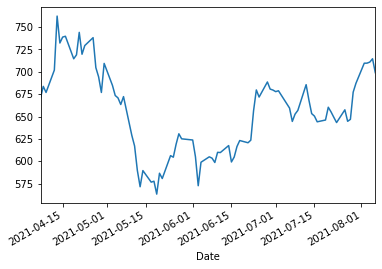

In [31]:
TSLA.plot()

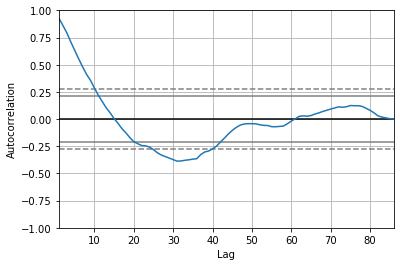

In [37]:
autocorrelation_plot(TSLA)

### ARIMA Model

In [50]:
model = ARIMA(TSLA[:42], order=(10,0,0))

C:\Users\marco\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\marco\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\marco\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [51]:
model_fit = model.fit()

In [52]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   42
Model:                ARIMA(10, 0, 0)   Log Likelihood                -185.535
Date:                Sun, 08 Aug 2021   AIC                            395.070
Time:                        16:00:12   BIC                            415.922
Sample:                             0   HQIC                           402.713
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        647.0560     39.569     16.353      0.000     569.503     724.609
ar.L1          0.8244      0.243      3.397      0.001       0.349       1.300
ar.L2          0.1443      0.369      0.391      0.6

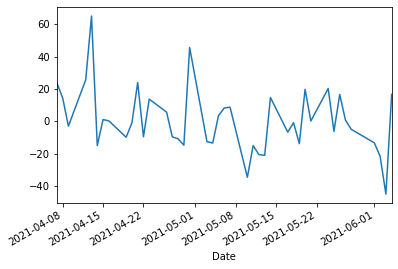

In [53]:
residuals = model_fit.resid
residuals.plot()

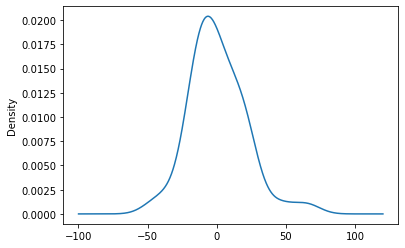

In [54]:
residuals.plot(kind='kde')

In [48]:
residuals.describe()

count    60.000000
mean      0.508090
std      18.108491
min     -45.851055
25%     -10.633103
50%      -0.821100
75%      10.387743
max      64.276634
dtype: float64